## Problem Statement and Objective

- Spark Funds wants to make investments in a few companies but after understanding the global trends


- Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors. 


- The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing’.


- Spark Funds has two minor constraints for investments: 
    - It wants to invest between 5 to 15 million USD per round of investment 
    - It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

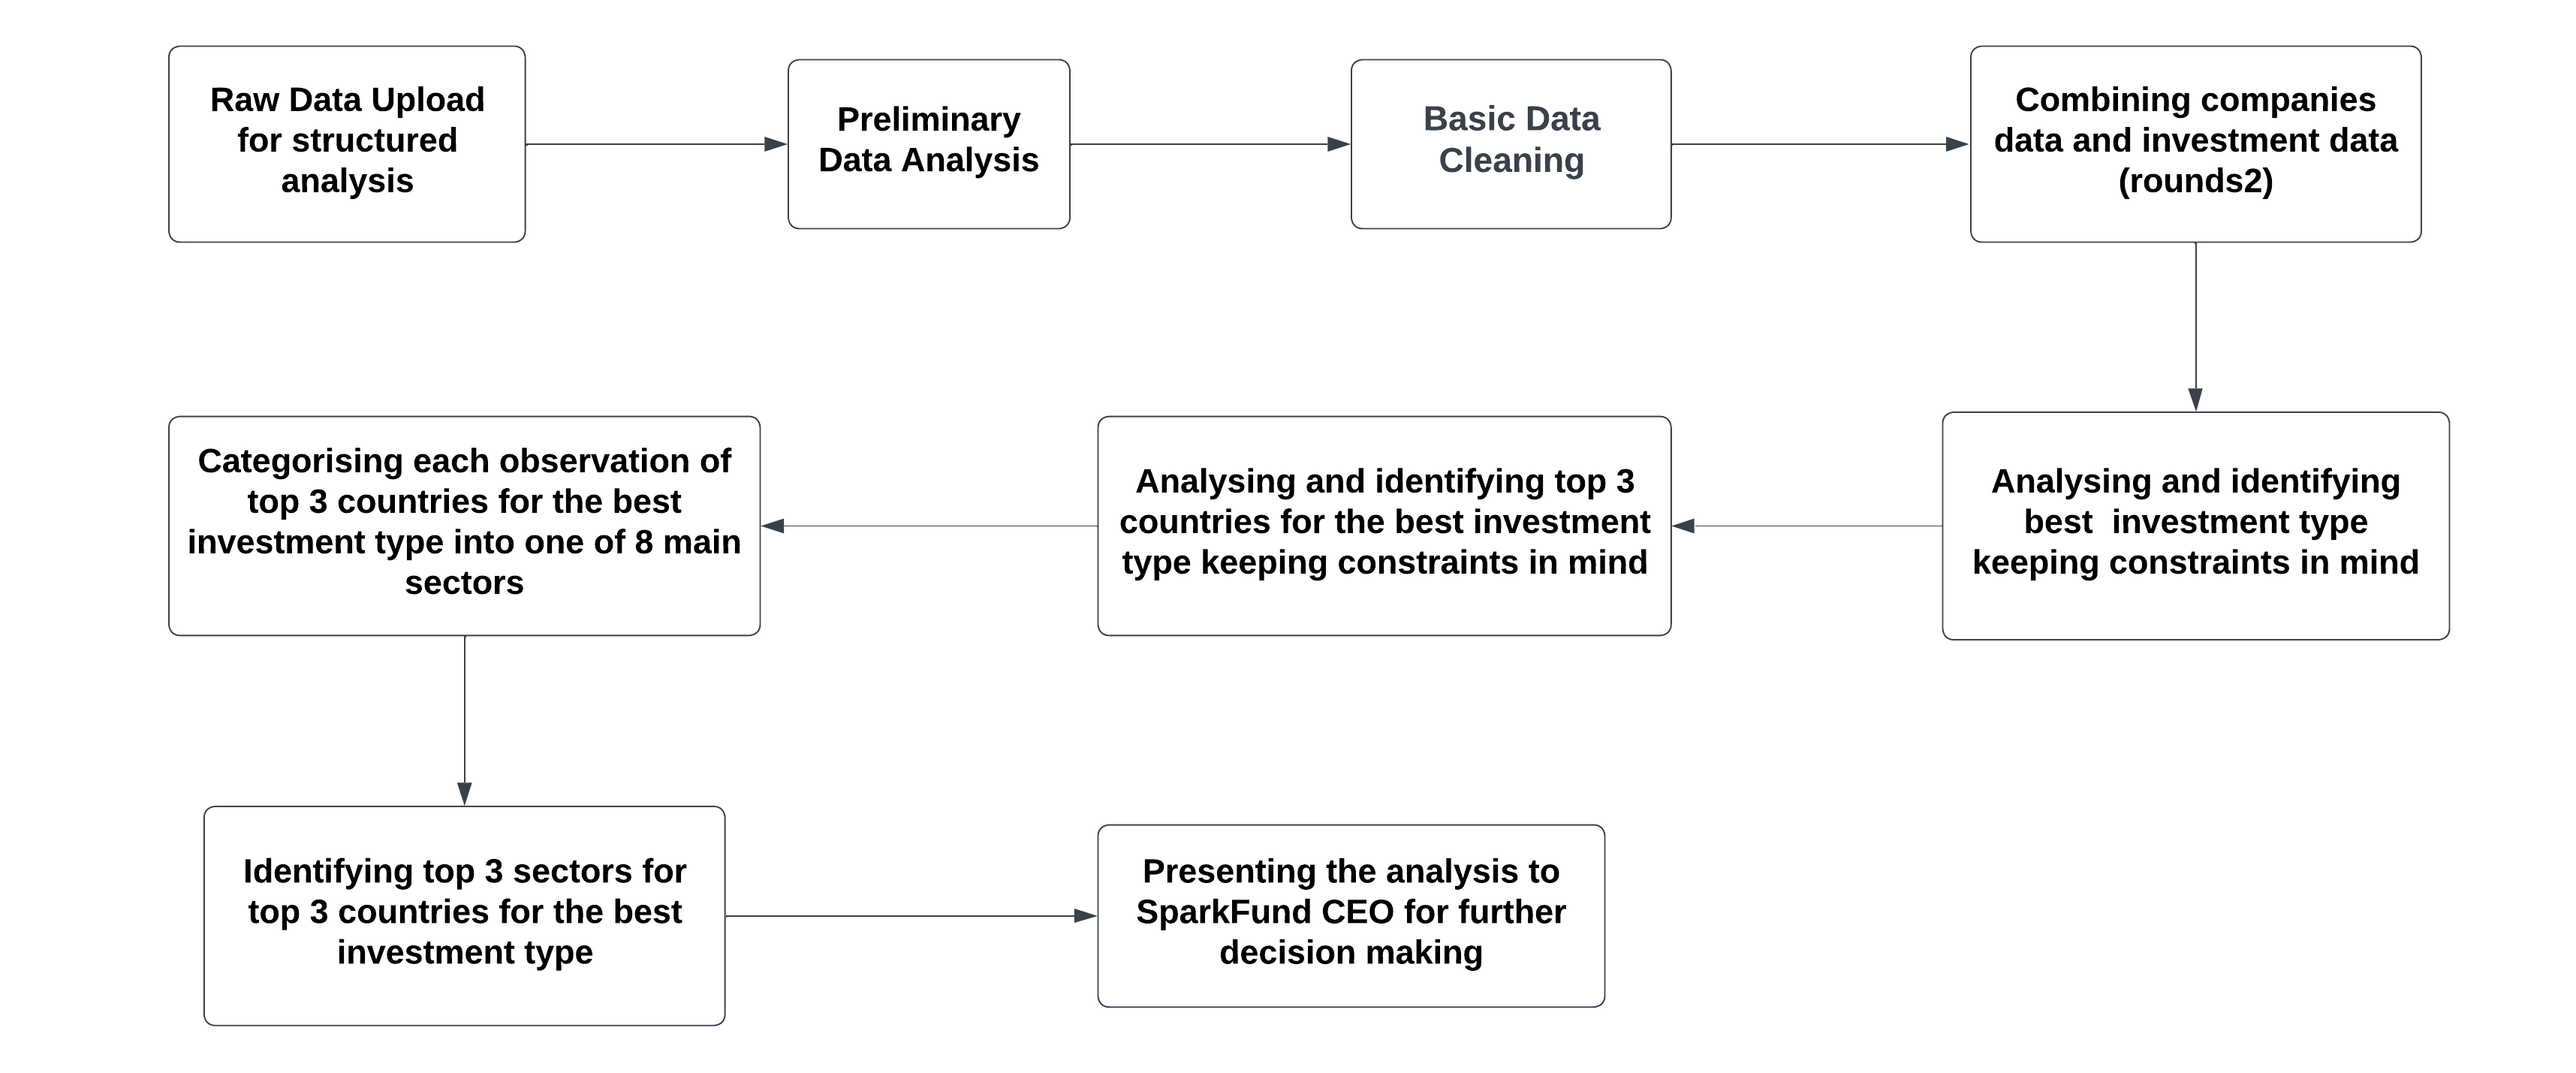

In [1]:
# Supress Warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy and pandas packages.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading csv files to Dataframes.**

**<font color = 'Blue'>Reading the `companies` dataframe.** Use `encoding` to specify an encoding to use when reading a file.

In [3]:
companies = pd.read_csv("companies.txt", sep='\t', encoding = "ISO-8859-1")
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


We have to drop region, city and founded_at columns because they are not useful.

In [5]:
# dropping unnecessary columns from the data
companies.drop(['region', 'city', 'founded_at'], axis=1, inplace = True) 
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL
...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA


**<font color = 'Blue'>Reading the `rounds2` Data**

In [6]:
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


**<font color = 'Blue'>Let's check for Duplicate values**

In [9]:
companies.drop_duplicates().shape

(66368, 7)

In [10]:
rounds2.drop_duplicates().shape

(114949, 6)

Number of entries haven't reduced. It means there aren't any duplicates.

<font color = green> **It is noted that special characters are appearing in the `name` and `permalink` column. This happened because of multiple-encoding schemes.** </font>

In [11]:
# taking care of multiple-encoding schemes
companies['permalink'] = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies['name'] = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
print(companies.shape)
companies

(66368, 7)


,permalink,name,homepage_url,category_list,status,country_code,state_code
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL
...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15
66365,/Organization/Eron,ERON,http://www.aeron.hu/,NaN,operating,NaN,NaN
66366,/Organization/Asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA


In [12]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL


In [13]:
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
print(rounds2.shape)
rounds2

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [14]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [15]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Let's merge the two dataframes. The common columns have matching values, but the strings are in mixed cases, lower or upper. **So, we need to convert them in either lower or upper case, to merge successfully.**

In [16]:
# convert to lower case, so that we can merge on common values
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

Before we proceed to merge, let's see the number of unique companies in both the dataframes.

In [17]:
# printing out number of unique companies.
print(companies['permalink'].count()) # total number of entries
print(companies['permalink'].nunique()) # total number of unique companies
# another method.
#len(companies['permalink'].value_counts().index)

66368
66368


In [18]:
# printing out number of unique companies.
print(rounds2['company_permalink'].count()) # total number of entries
print(rounds2['company_permalink'].nunique()) # total number of unique companies
# another method.
#len(rounds2['company_permalink'].value_counts().index)

114949
66368


Let's Check if `rounds2` has some other `'companies'` as well, other than those mentioned in the `companies` dataframe.

In [19]:
# All the companies in rounds2 are present in companies dataframe.
temp = set(rounds2['company_permalink'])
temp.issubset(set(companies['permalink']))
# another method.
#len(rounds2[~rounds2.company_permalink.isin(companies.permalink.values)].index)

True

True means the `rounds2` also has same `companies` data that is present in companies dataframe. 
**Let's create the `master_frame` by merging `companies` and `rounds2`.**

In [20]:
# merging companies and rounds2 into a master dataframe.
master_frame = rounds2.merge(companies, how='left', left_on='company_permalink', right_on='permalink')
# Let's drop 'permalink' column as we already have 'company_permalink'
master_frame = master_frame.drop('permalink',axis=1)
print(master_frame.shape)
master_frame.head()

(114949, 12)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22


In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
dtypes: float64(1), object(11)
memory usage: 11.4+ MB


`funding_round_code` has a lot of null values and funded_at column is unnecessary for us. So we can simply drop these columns. I have not removed it here but you can do it using the code below.

In [22]:
master_frame = master_frame.drop(columns = ['funding_round_code','funded_at'])

In [23]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   raised_amount_usd        94959 non-null   float64
 4   name                     114948 non-null  object 
 5   homepage_url             108815 non-null  object 
 6   category_list            111539 non-null  object 
 7   status                   114949 non-null  object 
 8   country_code             106271 non-null  object 
 9   state_code               104003 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.6+ MB


`permalink` has 0 null values. This again, is an indication that there are no such companies in `rounds2` that aren't also present in `companies` dataframe.

## <font color = 'green'>--------------------------------Reached Checkpoint 1. -------------------------------------</font>

<font color = red> **`raised_amount_usd` column has some null values. They won't help much in the analysis and investment strategy. So it is better to drop those rows**</font>

In [24]:
# Let's remove rows where raised_amount_usd is null.
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [25]:
master_frame.shape

(94959, 10)

So now after dropping the rows where raised amount was null, we are left with 94959 rows

Let's find the types of funding rounds and mean and medians of raised amounts.

In [26]:
# checking the types of fundings.
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23603
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

<font color = green>**We get one information here which is, mostly other investors are investing in `venture`** </font>

In [27]:
# other way to do the same thing that is done in below cell
#grp_by = master_frame.groupby('funding_round_type')
#mean = grp_by['raised_amount_usd'].mean().apply(lambda x: '%.0f' % x) # suppressing scientific notation
#median = grp_by['raised_amount_usd'].median().apply(lambda x: '%.0f' % x) # suppressing scientific notation

In [27]:
# group by types of funding and calculate mean and median.
f = {'raised_amount_usd':['mean','median']}
grp_by_fun_round = master_frame.groupby('funding_round_type').agg(f)
round(grp_by_fun_round.astype(float)/1000000, 2) # converting in millions and rounding off

raised_amount_usd       
                                   mean median
funding_round_type                            
angel                              0.96   0.40
convertible_note                   1.45   0.27
debt_financing                    17.04   1.10
equity_crowdfunding                0.54   0.10
grant                              4.30   0.20
non_equity_assistance              0.41   0.06
post_ipo_debt                    168.70  19.95
post_ipo_equity                   82.18  12.26
private_equity                    73.31  20.00
product_crowdfunding               1.36   0.18
secondary_market                  79.65  32.60
seed                               0.72   0.28
undisclosed                       19.24   1.02
venture                           11.75   5.00

**It seems from the above results, that venture type funding round will be best suited for Sparks Funds business strategy because this amount fall in the range of Sparks Funds, also other investors are investing in this.**

## <font color = 'green'>-----------------------------------Reached Checkpoint 2-------------------------------------

In [28]:
master_frame['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
PRY        1
SEN        1
GGY        1
DZA        1
BRB        1
Name: country_code, Length: 134, dtype: int64

**Let's find out top nine countries that get the highest amounts of funding in venture round.**

In [29]:
venture_funded = master_frame[master_frame['funding_round_type'] == 'venture']

In [30]:
print(venture_funded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        50228 non-null  object 
 1   funding_round_permalink  50228 non-null  object 
 2   funding_round_type       50228 non-null  object 
 3   raised_amount_usd        50228 non-null  float64
 4   name                     50228 non-null  object 
 5   homepage_url             47620 non-null  object 
 6   category_list            49726 non-null  object 
 7   status                   50228 non-null  object 
 8   country_code             48111 non-null  object 
 9   state_code               47367 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.2+ MB
None


**Let's group them by country code**

In [31]:
grp_by_country = venture_funded.groupby('country_code')

In [32]:
top9 = pd.DataFrame(grp_by_country['raised_amount_usd'].sum()).sort_values(by='raised_amount_usd', ascending = False)[0:9]
print(top9.info())
top9

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, USA to JPN
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raised_amount_usd  9 non-null      float64
dtypes: float64(1)
memory usage: 144.0+ bytes
None


,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [33]:
top9['raised_amount_usd'] = top9['raised_amount_usd'].apply(lambda x: '%.0f' % x) # suppressing scientific notation
top9 = top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,422510842796
1,CHN,39835418773
2,GBR,20245627416
3,IND,14391858718
4,CAN,9583332317
5,FRA,7259536732
6,ISR,6907514579
7,DEU,6346959822
8,JPN,3363676611


**This is the total amount raised by these companies in venture funding**

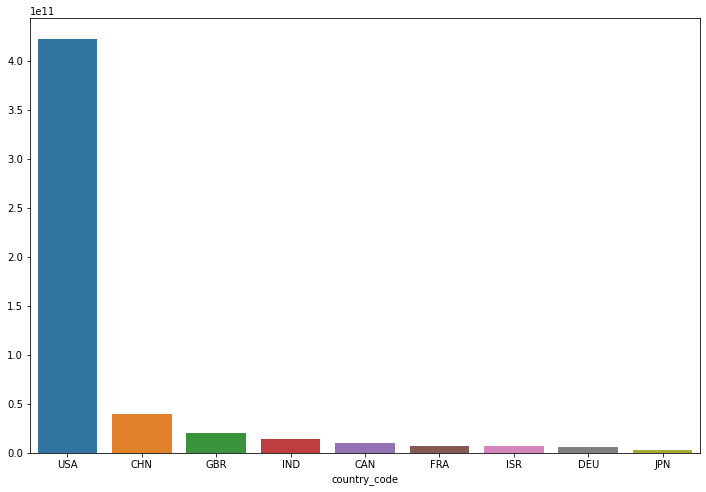

              raised_amount_usd
country_code                   
USA                4.225108e+11
CHN                3.983542e+10
GBR                2.024563e+10
IND                1.439186e+10
CAN                9.583332e+09
FRA                7.259537e+09
ISR                6.907515e+09
DEU                6.346960e+09
JPN                3.363677e+09 

Top 3 english speaking countries in order are: USA, GBR, IND


In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top9.index, y=top9.values.ravel())
plt.show()

print(top9, '\n')
print("Top 3 english speaking countries in order are: USA, GBR, IND")

**It seems that USA, Great Britain and India are the top 3 english-speaking countries in terms of funding in venture round.**

<font color = green>**Now at this point we know what are the best 3 countries and what is the best investment type. Now we have to find out the best 3 sectors to invest in**</font>

## <font color = 'Green'>-----------------------------------Reached Checkpoint 3. ------------------------------------

Now we are going to use mapping.csv file. This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The purpose is to simplify the analysis into eight sector buckets, rather than trying to analyse hundreds of them.

In [34]:
# Reading the mapping csv file.
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
print(mapping.info())
mapping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB
None


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


`category_list` contains '0' in some names in place of 'na'. This is a data quality issue.

In [35]:
# Let's see all the rows where this unnecessary 0 is appearing in the column category_list.
mapping[mapping['category_list'].str.contains("0",na=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
103,Chi0 Internet,0,0,0,0,0,0,1,0,0
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0


In [36]:
# It seems that 'na' must be present in place of 0. Only exception to this is 'Enterprise 2.0'. Let's take care of this.
mapping.loc[mapping['category_list']!= "Enterprise 2.0",'category_list' ] = mapping['category_list'].str.replace("0","na")
# Let's check if it worked.
mapping[mapping['category_list'].str.contains("0",na=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0


In [37]:
# Looking for other numbers that might have wrongly crept in.
mapping[mapping['category_list'].str.contains('0|1|2|3|4|5|6|7|8|9',na=False)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
48,B2B,0,0,0,0,0,0,0,0,1
49,B2B Express Delivery,0,0,0,0,0,0,0,0,1
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0
392,K-12 Education,0,0,0,0,0,0,0,1,0
423,M2M,0,0,0,0,0,0,0,1,0
507,P2P Money Transfer,0,0,0,0,0,0,0,0,1


Let's create a column `primary_sector`. The first category that appears in `category_list` will be considered as the primary sector.

In [38]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN


In [39]:
master_frame['primary_sector'] = master_frame['category_list'].str.split('|',1,expand=True)[0]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Games


**Let's find out primary sectors which are not a part of the 8 main sectors.**

In [40]:
# Checking if some primary sectors extracted are not a part of the category_list of mapping dataframe.
print(master_frame[~master_frame.primary_sector.isin(mapping.category_list.values)]['primary_sector'].nunique())
master_frame[~master_frame.primary_sector.isin(mapping.category_list.values)]['primary_sector'].value_counts()

42


Nanotechnology                     223
Navigation                          14
Natural Resources                   10
Natural Language Processing         10
Adaptive Equipment                   7
Toys                                 4
Nightlife                            4
Enterprise Hardware                  4
Golf Equipment                       4
Biotechnology and Semiconductor      3
Natural Gas Uses                     3
Internet TV                          3
Kinect                               2
Retirement                           2
Rapidly Expanding                    2
Deep Information Technology          2
Social Media Advertising             2
Google Glass                         2
Vacation Rentals                     1
Generation Y-Z                       1
Spas                                 1
Lingerie                             1
Testing                              1
Sex Industry                         1
Skill Gaming                         1
Internet Technology      

Null category points to `Blanks` as we are not sure which of the 8 main sectors it points to.

In [41]:
mapping[mapping['Blanks']==1]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0


Let's merge the `mapping` and `master_frame`.

In [42]:
master_frame = master_frame.merge(mapping, how='inner', left_on='primary_sector', right_on='category_list')
print(master_frame.shape)
master_frame.head()

(94634, 21)


,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,...,Media,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,...,Media,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,...,Media,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,...,Media,0,0,0,1,0,0,0,0,0
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,...,Media,0,0,0,1,0,0,0,0,0


In [43]:
# Looking at some basic info.
print(master_frame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94634 entries, 0 to 94633
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   company_permalink                        94634 non-null  object 
 1   funding_round_permalink                  94634 non-null  object 
 2   funding_round_type                       94634 non-null  object 
 3   raised_amount_usd                        94634 non-null  float64
 4   name                                     94633 non-null  object 
 5   homepage_url                             90321 non-null  object 
 6   category_list_x                          93590 non-null  object 
 7   status                                   94634 non-null  object 
 8   country_code                             88798 non-null  object 
 9   state_code                               87054 non-null  object 
 10  primary_sector                           93590

Let's create a new column `main_sector` which shows to which of the 8 main sectors the primary sector belongs to. This can be done by **unpivoting**.

In [44]:
master_frame = pd.melt(master_frame, 
            id_vars=['company_permalink', 'funding_round_permalink', 'funding_round_type',
                     'raised_amount_usd', 'name','homepage_url', 'category_list_x', 'status', 'country_code','state_code',
                     'primary_sector'], 
            value_vars=['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing',
                        'News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],
            var_name='main_sector')

In [46]:
master_frame['value'].value_counts()

0    757072
1     94634
Name: value, dtype: int64

In [47]:
master_frame = master_frame[master_frame['value']==1]

In [48]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,primary_sector,main_sector,value
51470,/organization/1871,/funding-round/eb9aa2a41fe562fa69053d43d39f26f2,grant,2500000.0,1871,http://www.1871.com,Designers|Internet|Non Profit|Startups,operating,USA,IL,Designers,Automotive & Sports,1
51471,/organization/artsetters,/funding-round/008c2a76bdf0ee640c2bcc355a2f97ff,seed,1000000.0,ArtSetters,http://www.ArtSetters.com,Designers|Marketplaces|Retail,operating,USA,NY,Designers,Automotive & Sports,1
51472,/organization/big-dipper-studio,/funding-round/372399535cafa7e0e02d0b4a290924d5,undisclosed,41250.0,Big Dipper Studio,http://www.bigdipperstudio.com/,Designers|Service Providers|Web Development,operating,HKG,NaN,Designers,Automotive & Sports,1
51473,/organization/chic-by-choice,/funding-round/955a32898f21001e3d54a5b4140baf80,venture,1588517.0,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,Designers,Automotive & Sports,1
51474,/organization/chic-by-choice,/funding-round/fc4368fa17da9a43230bd19b975fb0e2,seed,677448.0,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,Designers,Automotive & Sports,1


In [49]:
master_frame = master_frame.drop('value',axis=1) # Won't need the value column.
master_frame.reset_index(inplace=True,drop=True)

In [50]:
master_frame.rename(columns={'category_list_x':'category_list'}, inplace=True) 
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector,main_sector
0,/organization/1871,/funding-round/eb9aa2a41fe562fa69053d43d39f26f2,grant,2500000.0,1871,http://www.1871.com,Designers|Internet|Non Profit|Startups,operating,USA,IL,Designers,Automotive & Sports
1,/organization/artsetters,/funding-round/008c2a76bdf0ee640c2bcc355a2f97ff,seed,1000000.0,ArtSetters,http://www.ArtSetters.com,Designers|Marketplaces|Retail,operating,USA,NY,Designers,Automotive & Sports
2,/organization/big-dipper-studio,/funding-round/372399535cafa7e0e02d0b4a290924d5,undisclosed,41250.0,Big Dipper Studio,http://www.bigdipperstudio.com/,Designers|Service Providers|Web Development,operating,HKG,NaN,Designers,Automotive & Sports
3,/organization/chic-by-choice,/funding-round/955a32898f21001e3d54a5b4140baf80,venture,1588517.0,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,Designers,Automotive & Sports
4,/organization/chic-by-choice,/funding-round/fc4368fa17da9a43230bd19b975fb0e2,seed,677448.0,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,Designers,Automotive & Sports


In [51]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94634 entries, 0 to 94633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        94634 non-null  object 
 1   funding_round_permalink  94634 non-null  object 
 2   funding_round_type       94634 non-null  object 
 3   raised_amount_usd        94634 non-null  float64
 4   name                     94633 non-null  object 
 5   homepage_url             90321 non-null  object 
 6   category_list            93590 non-null  object 
 7   status                   94634 non-null  object 
 8   country_code             88798 non-null  object 
 9   state_code               87054 non-null  object 
 10  primary_sector           93590 non-null  object 
 11  main_sector              94634 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.7+ MB


## <font color = 'Green'>---------------------------------- Reached Checkpoint 4 --------------------------------------

Let's create dataframes according to our strategy for top 3 english-speaking countries.

In [52]:
D1 = master_frame[(master_frame['country_code']=='USA') & (master_frame['funding_round_type']=='venture') & 
                      (master_frame['raised_amount_usd']/1000000>=5) & (master_frame['raised_amount_usd']/1000000<=15)]
D2 = master_frame[(master_frame['country_code']=='GBR') & (master_frame['funding_round_type']=='venture') & 
                      (master_frame['raised_amount_usd']/1000000>=5) & (master_frame['raised_amount_usd']/1000000<=15)]
D3 = master_frame[(master_frame['country_code']=='IND') & (master_frame['funding_round_type']=='venture') & 
                      (master_frame['raised_amount_usd']/1000000>=5) & (master_frame['raised_amount_usd']/1000000<=15)]
D1.reset_index(inplace=True,drop=True)
D2.reset_index(inplace=True,drop=True)
D3.reset_index(inplace=True,drop=True)

In [53]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector,main_sector
0,/organization/design-within-reach,/funding-round/a28410569e71d10d0113c8a1400853bf,venture,15000000.0,Design Within Reach,http://www.dwr.com,Designers|E-Commerce|Indoor Positioning|Retail,acquired,USA,CT,Designers,Automotive & Sports
1,/organization/eloquii,/funding-round/379dedadf504acdc4ba74e2323f9d4c9,venture,6000000.0,Eloquii,http://www.eloquii.com/,Designers|Fashion|Retail,operating,USA,NY,Designers,Automotive & Sports
2,/organization/stio,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,5900000.0,Stio,http://www.stio.com/,Designers,operating,USA,MI,Designers,Automotive & Sports
3,/organization/bloo-solar,/funding-round/281338ea198970928b7f7fba60bcfd05,venture,10000000.0,Bloo Solar,http://www.bloosolar.com/,Design|Electronics|Energy|Solar,operating,USA,CA,Design,Automotive & Sports
4,/organization/california-linear-devices,/funding-round/2f1ad49bebd0a69798d071ab0f7cfb99,venture,10500000.0,California Linear Devices,NaN,Design,acquired,USA,CA,Design,Automotive & Sports


In [54]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector,main_sector
0,/organization/made-com,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,9278918.0,made.com,http://www.made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,H9,Design,Automotive & Sports
1,/organization/autoquake,/funding-round/067d143de46ec298cfa1893682f9911a,venture,11890000.0,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,Automotive,Automotive & Sports
2,/organization/autoquake,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,6000000.0,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,Automotive,Automotive & Sports
3,/organization/autoquake,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,5755376.0,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,Automotive,Automotive & Sports
4,/organization/autoquake,/funding-round/a4d5080cbda34c2ef4295d8fbe4e9ad5,venture,11911764.0,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,Automotive,Automotive & Sports


In [55]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector,main_sector
0,/organization/indianroots,/funding-round/f9e85b60f976b7a5e873de366db64159,venture,5000000.0,IndianRoots,http://www.indianroots.in/,Designers|E-Commerce|Fashion|Online Shopping,operating,IND,10,Designers,Automotive & Sports
1,/organization/tonbo-imaging,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,6400000.0,Tonbo Imaging,http://tonboimaging.com,Design,operating,IND,19,Design,Automotive & Sports
2,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,5000000.0,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Automotive,Automotive & Sports
3,/organization/ather-energy,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,12000000.0,Ather Energy,http://www.atherenergy.com,Automotive|Electric Vehicles,operating,IND,19,Automotive,Automotive & Sports
4,/organization/cardekho,/funding-round/3875ae874b0511ede2f7d8597e0d126f,venture,15000000.0,Cardekho,http://www.cardekho.com/,Automotive|Cars|Online Shopping,operating,IND,10,Automotive,Automotive & Sports


Let's find out the amounts of funding according to sectors and also the number of companies in those sectors.

In [56]:
D1['count_main_Sec'] = D1.groupby('main_sector')['raised_amount_usd'].transform('count')
D1['total_amt_invst_main_Sec'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum').apply(lambda x: '%.0f' %x)
D2['count_main_Sec'] = D2.groupby('main_sector')['raised_amount_usd'].transform('count')
D2['total_amt_invst_main_Sec'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum').apply(lambda x: '%.0f' %x)
D3['count_main_Sec'] = D3.groupby('main_sector')['raised_amount_usd'].transform('count')
D3['total_amt_invst_main_Sec'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum').apply(lambda x: '%.0f' %x)

In [73]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,primary_sector,main_sector,count_main_Sec,total_amt_invst_main_Sec
0,/organization/design-within-reach,/funding-round/a28410569e71d10d0113c8a1400853bf,venture,15000000.0,Design Within Reach,http://www.dwr.com,Designers|E-Commerce|Indoor Positioning|Retail,acquired,USA,CT,Designers,Automotive & Sports,167,1454104361
1,/organization/eloquii,/funding-round/379dedadf504acdc4ba74e2323f9d4c9,venture,6000000.0,Eloquii,http://www.eloquii.com/,Designers|Fashion|Retail,operating,USA,NY,Designers,Automotive & Sports,167,1454104361
2,/organization/stio,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,5900000.0,Stio,http://www.stio.com/,Designers,operating,USA,MI,Designers,Automotive & Sports,167,1454104361
3,/organization/bloo-solar,/funding-round/281338ea198970928b7f7fba60bcfd05,venture,10000000.0,Bloo Solar,http://www.bloosolar.com/,Design|Electronics|Energy|Solar,operating,USA,CA,Design,Automotive & Sports,167,1454104361
4,/organization/california-linear-devices,/funding-round/2f1ad49bebd0a69798d071ab0f7cfb99,venture,10500000.0,California Linear Devices,NaN,Design,acquired,USA,CA,Design,Automotive & Sports,167,1454104361


Let's drop rows where main sector is `Blanks`

In [61]:
D1 = D1[~(D1.main_sector == 'Blanks')]
D2 = D2[~(D2.main_sector == 'Blanks')]
D3 = D3[~(D3.main_sector == 'Blanks')]

## Let's answer some questions

**How much Investment each country has got?**

In [77]:
np.sum(D1['count_main_Sec'].unique().astype(int))

array([ 167, 2300,  591,  909,  799, 1582, 2950, 2714], dtype=int64)

In [75]:
D2['count_main_Sec'].unique().astype(int)

array([ 16, 128,  56,  24,  42,  73, 147, 133])

In [62]:
print('Total number of investments in D1 is', pd.Series(D1['count_main_Sec'].unique().astype(int)).sum())
print('Total number of investments in D2 is', pd.Series(D2['count_main_Sec'].unique().astype(int)).sum())
print('Total number of investments in D3 is', pd.Series(D3['count_main_Sec'].unique().astype(int)).sum())

Total number of investments in D1 is 12012
Total number of investments in D2 is 619
Total number of investments in D3 is 328


**What is the total amount of investment in each country?**

In [63]:
print('Total sum of investments in D1 is',pd.Series(D1['total_amt_invst_main_Sec'].unique().astype(float)).sum())
print('Total sum of investments in D2 is',pd.Series(D2['total_amt_invst_main_Sec'].unique().astype(float)).sum())
print('Total sum of investments in D3 is',pd.Series(D3['total_amt_invst_main_Sec'].unique().astype(float)).sum())

Total sum of investments in D1 is 107318294664.0
Total sum of investments in D2 is 5365228300.0
Total sum of investments in D3 is 2949543602.0


**Which sectors are among best 3 sectors for investment in each country?**

`For USA`

In [65]:
sorted(D1['count_main_Sec'].unique(), reverse=True)

[2950, 2714, 2300, 1582, 909, 799, 591, 167]

In [ ]:
D1[D1['count_main_Sec']==2950]['main_sector'].unique()

In [64]:
print('Top Sector is', D1[D1['count_main_Sec']==2950].main_sector.unique())
print('2nd best Sector is', D1[D1['count_main_Sec']==2714].main_sector.unique())
print('3rd best Sector is', D1[D1['count_main_Sec']==2300].main_sector.unique())

Top Sector is ['Others']
2nd best Sector is ['Social, Finance, Analytics, Advertising']
3rd best Sector is ['Cleantech / Semiconductors']


`For Great-Britain`

In [66]:
sorted(D2['count_main_Sec'].unique(), reverse=True)

[147, 133, 128, 73, 56, 42, 24, 16]

In [67]:
print('Top Sector is', D2[D2['count_main_Sec']==147].main_sector.unique())
print('2nd best Sector is', D2[D2['count_main_Sec']==133].main_sector.unique())
print('3rd best Sector is', D2[D2['count_main_Sec']==128].main_sector.unique())

Top Sector is ['Others']
2nd best Sector is ['Social, Finance, Analytics, Advertising']
3rd best Sector is ['Cleantech / Semiconductors']


`For India`

In [68]:
sorted(D3['count_main_Sec'].unique(), reverse=True)

[110, 60, 52, 33, 21, 20, 19, 13]

In [69]:
print('Top Sector is', D3[D3['count_main_Sec']==110].main_sector.unique())
print('2nd best Sector is', D3[D3['count_main_Sec']==60].main_sector.unique())
print('3rd best Sector is', D3[D3['count_main_Sec']==52].main_sector.unique())

Top Sector is ['Others']
2nd best Sector is ['Social, Finance, Analytics, Advertising']
3rd best Sector is ['News, Search and Messaging']


**For top sectors in each country, which companies recieved the highest investment?**

`For USA`

In [70]:
grp_by_company_D1 = D1[D1.main_sector=='Others'].groupby(by='name')
pd.DataFrame(grp_by_company_D1['raised_amount_usd'].sum()).sort_values(by='raised_amount_usd',axis=0,ascending=False)[0:5]

,raised_amount_usd
name,
Virtustream,64300000.0
Capella Photonics,54968051.0
AirTight Networks,54201907.0
deCarta,52100000.0
Black Duck Software,51000000.0


`For Britain`

In [71]:
grp_by_company_D2 = D2[D2.main_sector=='Others'].groupby(by='name')
pd.DataFrame(grp_by_company_D2['raised_amount_usd'].sum()).sort_values(by='raised_amount_usd',axis=0,ascending=False)[0:5]

,raised_amount_usd
name,
Electric Cloud,37000000.0
SenSage,36250000.0
Enigmatec,32500000.0
SilverRail Technologies,29000000.0
OpenCloud,27972766.0


`For India`

In [72]:
grp_by_company_D3 = D3[D3.main_sector=='Others'].groupby(by='name')
pd.DataFrame(grp_by_company_D3['raised_amount_usd'].sum()).sort_values(by='raised_amount_usd',axis=0,ascending=False)[0:5]

,raised_amount_usd
name,
FirstCry.com,39000000.0
Myntra,38000000.0
CommonFloor,32900000.0
Pepperfry.com,28000000.0
ItzCash Card Ltd.,25000000.0


## <font color = 'Green'>------------------------------------- Reached Checkpoint 5 ------------------------------------

In [ ]:
master_frame.to_csv('master_frame.csv', encoding='utf-8', index=False)
D1.to_csv('D1.csv', encoding='utf-8', index=False)
D2.to_csv('D2.csv', encoding='utf-8', index=False)
D3.to_csv('D3.csv', encoding='utf-8', index=False)

### Conclusions

Keeping the constraints in mind, **'Venture'** investment type is best suited for Spark Funds. 

- In the **'Venture'** investment type, top 3 countries for investment are : 
    1. **`USA`**
    2. **`GBR`**
    3. **`IND`**


- For **USA** top 3 sectors in terms of Investment of Venture type are : `'Others'`, `'Social, Finance, Analytics, Advertising'`, `'Cleantech / Semiconductors'` 

- For **GBR** top 3 sectors in terms of Investment of Venture type are : `'Others'`, `'Social, Finance, Analytics, Advertising'`, `'Cleantech / Semiconductors'` 

- For **IND** top 3 sectors in terms of Investment of Venture type are : `'Others'`, `'Social, Finance, Analytics, Advertising'`, `'News, Search and Messaging'` 

- Thus, **Others** sector is most prominent in all 3 countries. But, it can be further drilled down as **Others** can be amalgamation of different sectors. 

- Sector **'Social, Finance, Analytics, Advertising'** can also be considered as it is No.2 in all three countries

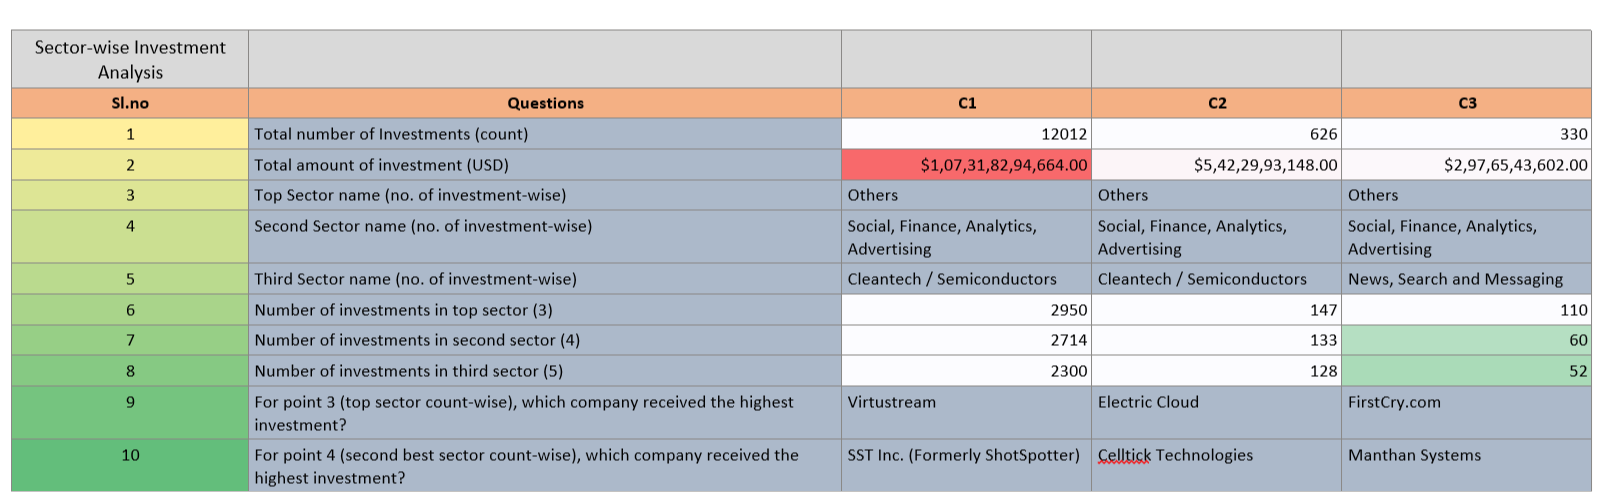